In [1]:
# Ячейка 1: Импорт библиотек и настройка
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append('../src')

from database import load_corrosion_data

# Настройки визуализации
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Библиотеки загружены")

Библиотеки загружены


In [14]:
# Ячейка 2: Загрузка и предварительный просмотр данных
df = load_corrosion_data()
print(f"📊 Загружено записей: {len(df)}")

📊 Загружено записей: 442052


In [15]:
# Фильтрация по конкретной установке
INSTALLATION_FILTER = 'АВТ-5'
df_filtered = df[df['installation'] == INSTALLATION_FILTER]

print(f"После фильтрации по '{INSTALLATION_FILTER}': {len(df_kk_2):,} строк")

# Покажем доступные химические колонки
chemical_columns = [col for col in df_filtered.columns if 'content' in col or 'total_' in col]
print(f"Химические параметры ({len(chemical_columns)}):")
for i, col in enumerate(chemical_columns):
    print(f"  {i+1:2d}. {col}")

df[['corrosion_rate'] + chemical_columns[:5]].head(3)

После фильтрации по 'АВТ-5': 76,014 строк
Химические параметры (38):
   1. water_content
   2. h2s_content
   3. sulfur_content
   4. chlorine_content
   5. co2_content
   6. oxygen_content
   7. nitrogen_content
   8. hydrogen_content
   9. methane_content
  10. ethane_content
  11. propane_content
  12. butane_content
  13. isobutane_content
  14. pentane_content
  15. isopentane_content
  16. gasoline_c6_c8_content
  17. hexane_content
  18. heavy_naphtha_content
  19. kerosene_content
  20. diesel_content
  21. residues_content
  22. propylene_content
  23. ethylene_content
  24. butylene_content
  25. sulfuric_acid_content
  26. hydrochloric_acid_content
  27. acetic_acid_content
  28. naphthenic_acid_content
  29. ammonia_content
  30. ammonium_content
  31. hydrogen_fluoride_content
  32. sodium_hydroxide_content
  33. corrosion_inhibitor_content
  34. total_components
  35. total_composition
  36. total_sulfur_compounds
  37. total_chlorine_compounds
  38. total_acids


,corrosion_rate,water_content,h2s_content,sulfur_content,chlorine_content,co2_content
0,NaN,0.5941,0.002,1.96,NaN,NaN
1,0.237175,0.5941,0.002,1.96,NaN,NaN
2,NaN,0.5941,0.002,1.96,NaN,NaN


In [25]:
# Очистка данных
print("ОЧИСТКА ДАННЫХ")

# Удаляем записи без скорости коррозии
initial_count = len(df_filtered)
df_clean = df_filtered[df_filtered['corrosion_rate'].notna()].copy()
print(f"Удалено записей без скорости коррозии: {initial_count - len(df_clean)}")

# Удаляем выбросы
df_clean = df_clean[df_clean['corrosion_rate'] <= 10]
df_clean = df_clean[df_clean['corrosion_rate'] >= 0]
print(f"Удалено выбросов: {initial_count - len(df_clean)}")
print(f"Итоговый размер данных: {len(df_clean)} записей")

# Заполняем пропуски в химических компонентах
for col in chemical_columns:
    df_clean[col] = df_clean[col].fillna(0)

print("Данные очищены и готовы для анализа")

ОЧИСТКА ДАННЫХ
Удалено записей без скорости коррозии: 16343
Удалено выбросов: 16347
Итоговый размер данных: 59667 записей
Данные очищены и готовы для анализа


C:\Users\admin\AppData\Local\Temp\ipykernel_18384\1142420895.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].fillna(0)


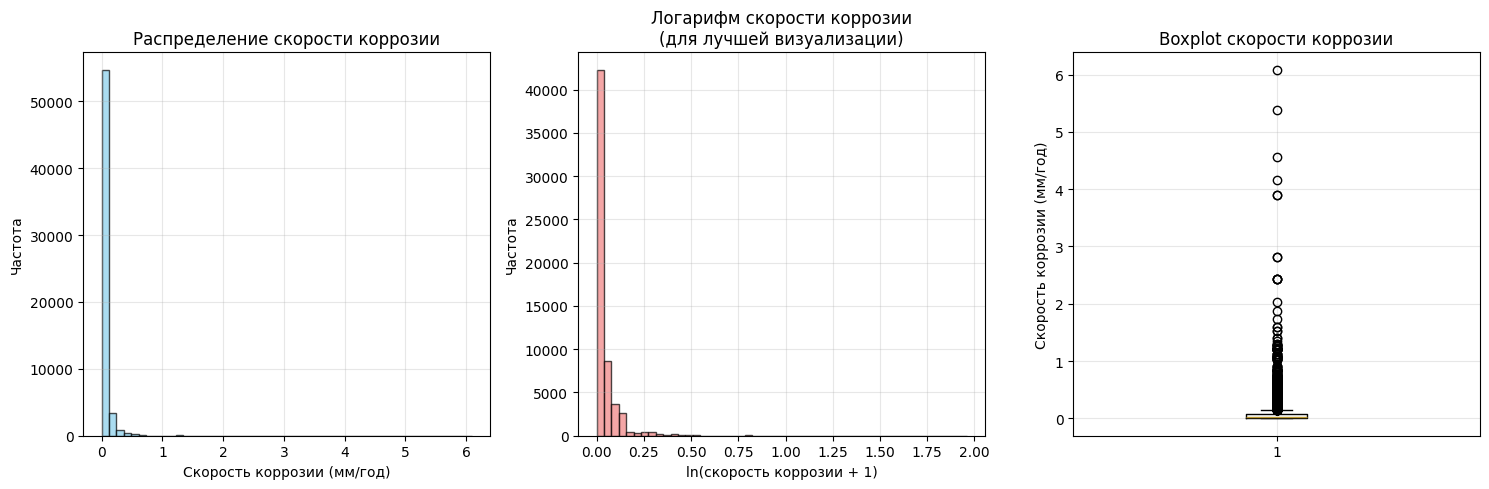

Статистика скорости коррозии:
count    59667.000000
mean         0.052012
std          0.103910
min          0.000000
25%          0.012489
50%          0.031059
75%          0.066651
max          6.087500
Name: corrosion_rate, dtype: float64


In [26]:
# Анализ распределения скорости коррозии
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_clean['corrosion_rate'], bins=50, alpha=0.7, edgecolor='black', color='skyblue')
plt.title('Распределение скорости коррозии')
plt.xlabel('Скорость коррозии (мм/год)')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
corrosion_log = np.log1p(df_clean['corrosion_rate'])
plt.hist(corrosion_log, bins=50, alpha=0.7, edgecolor='black', color='lightcoral')
plt.title('Логарифм скорости коррозии\n(для лучшей визуализации)')
plt.xlabel('ln(скорость коррозии + 1)')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.boxplot(df_clean['corrosion_rate'])
plt.title('Boxplot скорости коррозии')
plt.ylabel('Скорость коррозии (мм/год)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Статистика скорости коррозии:")
print(df_clean['corrosion_rate'].describe())

In [27]:
# После построения графиков добавьте анализ:

print("=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ СКОРОСТИ КОРРОЗИИ ===")

# 1. Анализ формы распределения
skewness = df_clean['corrosion_rate'].skew()
print(f"Асимметрия распределения: {skewness:.3f}")
if abs(skewness) > 1:
    print("→ Сильно скощенное распределение")
elif abs(skewness) > 0.5:
    print("→ Умеренно скощенное распределение") 
else:
    print("→ Близко к симметричному")

# 2. Анализ выбросов
Q1 = df_clean['corrosion_rate'].quantile(0.25)
Q3 = df_clean['corrosion_rate'].quantile(0.75)
IQR = Q3 - Q1
outliers_high = df_clean[df_clean['corrosion_rate'] > Q3 + 1.5*IQR]
outliers_low = df_clean[df_clean['corrosion_rate'] < Q1 - 1.5*IQR]

print(f"Выбросы (высокие): {len(outliers_high)} наблюдений")
print(f"Выбросы (низкие): {len(outliers_low)} наблюдений")

# 3. Анализ концентрации данных
mode_interval = df_clean['corrosion_rate'].mode()
print(f"Наиболее частое значение: {mode_interval.values[0]:.3f} мм/год")

# 4. Практическая интерпретация
mean_val = df_clean['corrosion_rate'].mean()
median_val = df_clean['corrosion_rate'].median()
print(f"\nПРАКТИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ:")
print(f"• Средняя скорость коррозии: {mean_val:.3f} мм/год")
print(f"• Типичная скорость (медиана): {median_val:.3f} мм/год")
print(f"• Разница mean-median: {mean_val-median_val:.3f} → ", 
      "положительная асимметрия" if mean_val > median_val else "отрицательная асимметрия")

# 5. Рекомендации по обработке данных
if len(outliers_high) > 0:
    print(f"\nРЕКОМЕНДАЦИИ:")
    print("• Рассмотрите логарифмирование для регрессионного анализа")
    print("• Исследуйте природу выбросов - это ошибки измерения или реальные аномалии?")
    print("• Для некоторых моделей может потребоваться нормализация данных")

=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ СКОРОСТИ КОРРОЗИИ ===
Асимметрия распределения: 15.152
→ Сильно скощенное распределение
Выбросы (высокие): 4658 наблюдений
Выбросы (низкие): 0 наблюдений
Наиболее частое значение: 0.000 мм/год

ПРАКТИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ:
• Средняя скорость коррозии: 0.052 мм/год
• Типичная скорость (медиана): 0.031 мм/год
• Разница mean-median: 0.021 →  положительная асимметрия

РЕКОМЕНДАЦИИ:
• Рассмотрите логарифмирование для регрессионного анализа
• Исследуйте природу выбросов - это ошибки измерения или реальные аномалии?
• Для некоторых моделей может потребоваться нормализация данных


In [28]:
# Выбор ключевых параметров для анализа
# Группируем параметры по категориям
parameter_groups = {
    'Основные коррозионные агенты': [
        'corrosion_rate', 'water_content', 'h2s_content', 'sulfur_content', 
        'chlorine_content', 'co2_content', 'oxygen_content'
    ],
    'Углеводороды легкие': [
        'methane_content', 'ethane_content', 'propane_content', 
        'butane_content', 'isobutane_content'
    ],
    'Углеводороды тяжелые': [
        'pentane_content', 'gasoline_c6_c8_content', 'heavy_naphtha_content',
        'kerosene_content', 'diesel_content', 'residues_content'
    ],
    'Непредельные и кислоты': [
        'propylene_content', 'ethylene_content', 'sulfuric_acid_content',
        'hydrochloric_acid_content', 'acetic_acid_content', 'naphthenic_acid_content'
    ],
    'Прочие параметры': [
        'nitrogen_content', 'hydrogen_content', 'ammonia_content',
        'corrosion_inhibitor_content', 'operating_temperature', 'operating_pressure'
    ],
    'Агрегатные показатели': [
        'total_sulfur_compounds', 'total_chlorine_compounds', 'total_acids',
        'total_components', 'total_composition'
    ]
}

print("ГРУППЫ ПАРАМЕТРОВ ДЛЯ АНАЛИЗА:")
for group_name, params in parameter_groups.items():
    print(f"  {group_name}: {len(params)} параметров")

ГРУППЫ ПАРАМЕТРОВ ДЛЯ АНАЛИЗА:
  Основные коррозионные агенты: 7 параметров
  Углеводороды легкие: 5 параметров
  Углеводороды тяжелые: 6 параметров
  Непредельные и кислоты: 6 параметров
  Прочие параметры: 6 параметров
  Агрегатные показатели: 5 параметров


In [29]:
# Ячейка 6: Общая матрица корреляций для топ-20 параметров
# Выбираем все числовые параметры кроме ID
numeric_columns = [
    'corrosion_rate', 'water_content', 'h2s_content', 'sulfur_content',
    'chlorine_content', 'co2_content', 'oxygen_content', 'nitrogen_content',
    'hydrogen_content', 'methane_content', 'ethane_content', 'propane_content',
    'butane_content', 'propylene_content', 'ethylene_content', 
    'sulfuric_acid_content', 'hydrochloric_acid_content', 
    'total_sulfur_compounds', 'total_chlorine_compounds', 'total_acids',
    'operating_temperature', 'operating_pressure'
]

# Ограничиваемся параметрами, которые есть в данных
available_columns = [col for col in numeric_columns if col in df_clean.columns]
corr_matrix = df_clean[available_columns].corr()

print("РАСЧЕТ МАТРИЦЫ КОРРЕЛЯЦИЙ")

РАСЧЕТ МАТРИЦЫ КОРРЕЛЯЦИЙ


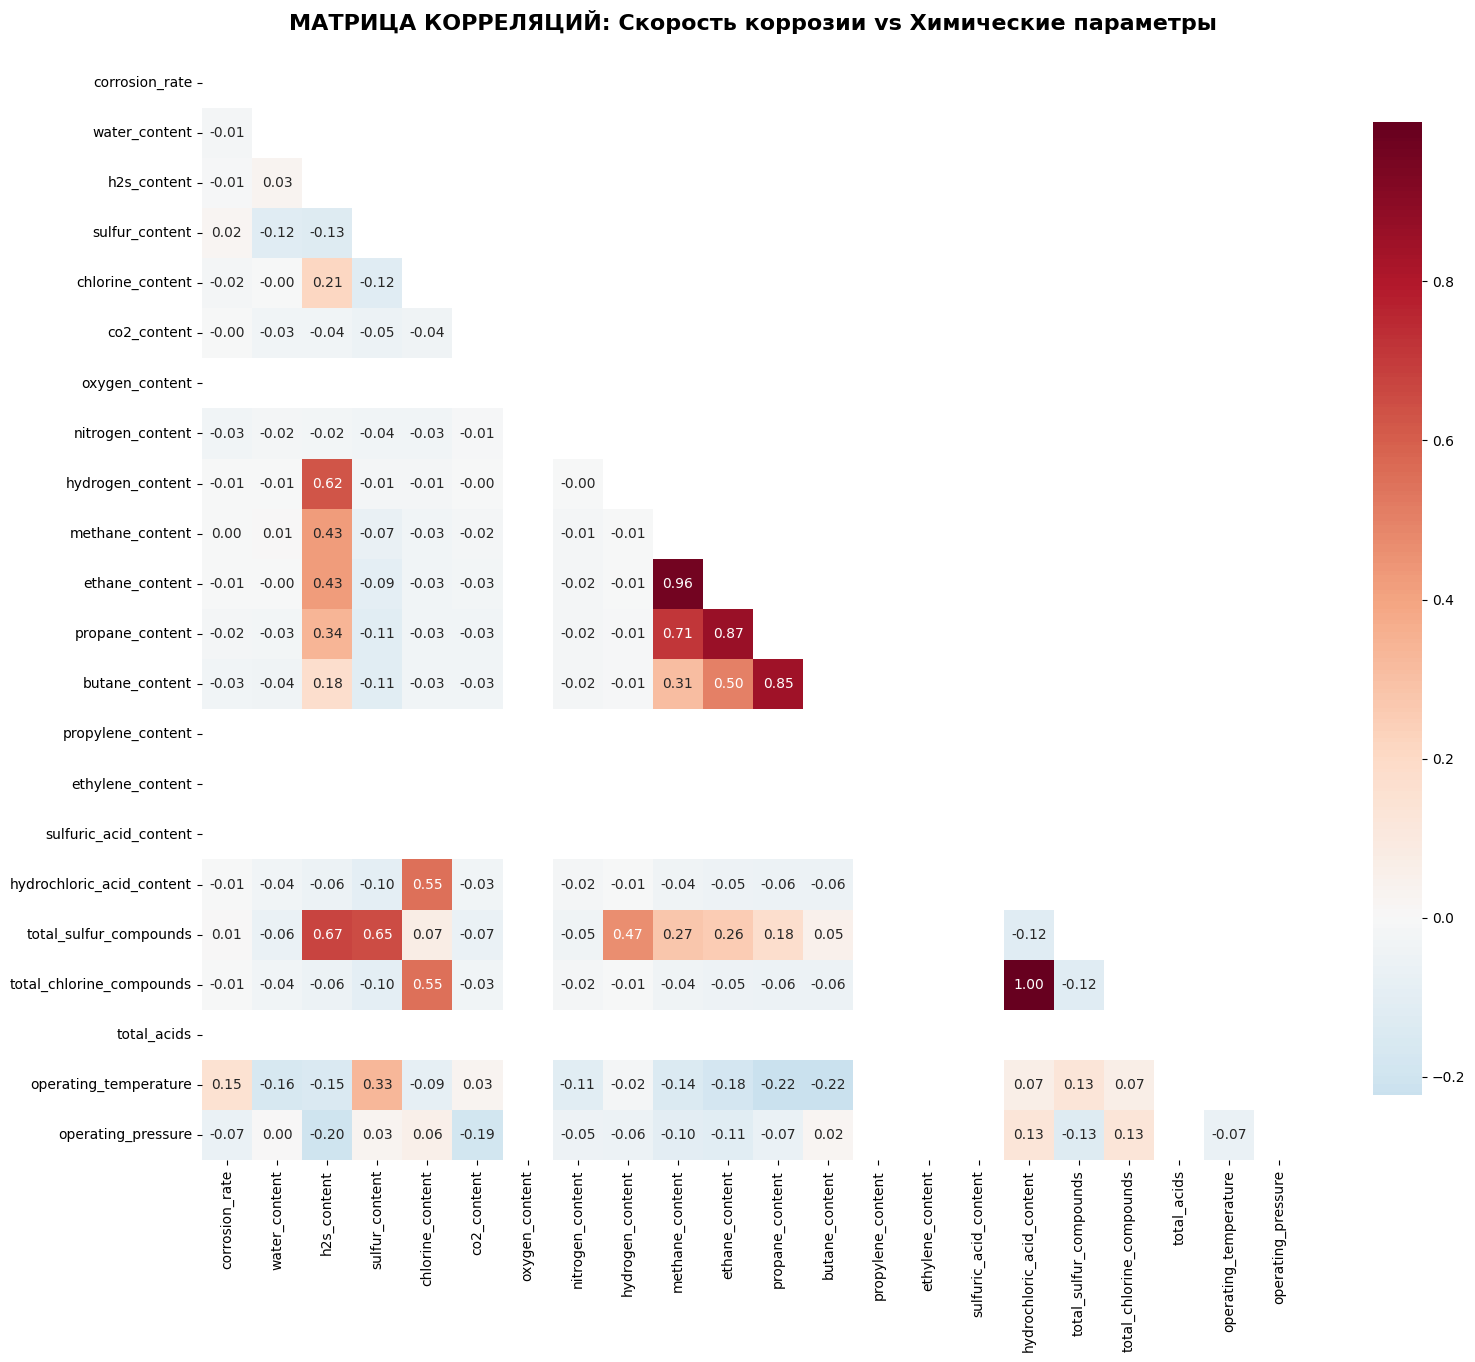

In [30]:
# Ячейка 7: Визуализация общей матрицы корреляций
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
           mask=mask,
           annot=True, 
           cmap='RdBu_r', 
           center=0,
           fmt='.2f',
           square=True,
           cbar_kws={'shrink': 0.8})

plt.title('МАТРИЦА КОРРЕЛЯЦИЙ: Скорость коррозии vs Химические параметры', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()